# Introduction
The purpose of this project is to investigate weather the liberal / conservative spectrum is really the best way describe how american public opinion varies. To investigate this, I used data from Pew Research Center's 2017 political typology quiz. This dataset consists of U.S citizens individual answers to political questions as well as some demographic data about them.

After selecting a subset of questions, I will treat each individual as a point in a multidimensional space where each of the questions is a dimension. 

### Imports

In [1]:
#import relevent packages
import pandas as pd
import numpy as np

#load in the data
data=pd.read_excel('typology.xlsx')
data.head()

,mergeid,sample,int_date,phase,fcall,attempts,refusal,stimes,ilang,p1version,...,ql1,ql1a,qc1,ll,cp,money2,ckinfo,iphoneuse,hphoneuse,weight
0,1100009,1,61417,1,170608,4,0,4,1,2,...,1,0,0,1,1,0,0,2,2,1.064516
1,1100012,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,4.000000
2,1100014,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.612903
3,1100018,1,61417,1,170608,6,1,6,1,2,...,1,0,0,1,1,0,0,2,2,3.741935
4,1100019,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.258065


### Data Wrangling 

Something to understand here is that this dataset consists of two "forms" and individuals were only asked questions from one of the forms. For this project I will only be looking at "form 1" and this is where I select those rows.

In [2]:
data.iloc[2500:2510, 20:40]
form1 = data.iloc[0:2504 ,:]
form1.tail()

,mergeid,sample,int_date,phase,fcall,attempts,refusal,stimes,ilang,p1version,...,ql1,ql1a,qc1,ll,cp,money2,ckinfo,iphoneuse,hphoneuse,weight
2499,1225104,2,61817,1,170615,4,0,4,1,2,...,0,0,1,1,1,9,0,2,2,1.967742
2500,1225116,2,61817,1,170614,3,0,3,1,2,...,0,0,2,0,1,1,1,3,3,3.677419
2501,1225166,2,61817,1,170613,6,0,6,1,2,...,0,0,2,0,1,9,0,3,3,2.290323
2502,1225178,2,61817,1,170614,4,0,4,1,2,...,0,0,1,1,1,1,1,2,2,1.806452
2503,1225205,2,61817,1,170610,6,0,6,1,2,...,0,0,1,1,1,9,0,2,2,1.290323


The next step is to find a subset of questions to include in my analysis. I do that here. The questions can be found in the word document of this project.

In [3]:
#Those shows all the columns, I will then select the ones I want
list(form1)

['mergeid',
 'sample',
 'int_date',
 'phase',
 'fcall',
 'attempts',
 'refusal',
 'stimes',
 'ilang',
 'p1version',
 'cregion',
 'state',
 'density',
 'usr',
 'scregion',
 'sstate',
 'susr',
 'igender',
 'irace',
 'llitext1',
 'llitext2',
 'qs1',
 'cpitext1',
 'cpitext2',
 'qa1',
 'qa1a',
 'qb2',
 'qb3',
 'qb4',
 'qa12',
 'qa14a',
 'qa14b',
 'qa14c',
 'qa14d',
 'qa14e',
 'qa15a',
 'qa15b',
 'qb18a',
 'qb18b',
 'q25a',
 'q25b',
 'q25c',
 'q25d',
 'q25f',
 'q25g',
 'q25i',
 'q25k',
 'q25n',
 'q25p',
 'qa26',
 'qa27',
 'qb27',
 'qb28',
 'qb29',
 'qa30',
 'qb30',
 'qb31',
 'oftvote',
 'qb32',
 'qb33',
 'qb33a',
 'cheat',
 'qa36a',
 'qa36b',
 'qa36c',
 'qa36d',
 'qa37a',
 'qa37b',
 'qa37c',
 'qa37d',
 'q40',
 'qb42a',
 'qb42b',
 'qb42c',
 'qb42d',
 'qb46',
 'q50r',
 'q50u',
 'q50y',
 'q50aa',
 'q50cc',
 'q50ee',
 'q50hh',
 'qbx',
 'qe2',
 'qe1',
 'qe3',
 'employ1',
 'employ7',
 'qe11',
 'q51jj',
 'q51ll',
 'q51mm',
 'q51nn',
 'q51pp',
 'q51qq',
 'q51rr',
 'qb52',
 'qb52x',
 'qb53a',
 'qb53b

In [4]:
## This list only includes questions on form 1 (found on the word document) 

qList = ['qa12', 'qa14a', 'qa14b', 'qa14c', 'qa14d', 'qa14e', 'q25a', 'q25b', 'q25c', 'q25d', 'q25f', 'q25g', 
         'q25i', 'q25k', 'q25n', 'qa26', 'qa36a', 'qa36b', 'qa36c', 'qa36d', 'qa37a', 'qa37b', 'qa37c', 'qa37d', 
         'q50r', 'q50u', 'q50y', 'q50aa', 'q50cc', 'q50ee', 'q51jj', 'q51ll', 'q51nn', 'qa62', 'qa77', 'qa77a',
         'qa77b', 'qa78', 'qa126', 'qa126a', 'qa126b', 'qa127', 'qa128','qa129', 'qa143']
 
f1 = form1[qList]

At this point, some work is necessary to get put this data in a format we can work with. Most of the questions have two answers each of which is represented by a 1 or 2. Other questions have different numbering systems, but need to be converted to match up with the rest.

Also, most of the questions have '9' and other numbers if the person didn't know or refused to answer. These types of answers will be changed so there are exactly 'between' the other two answers. All the work is done here:

In [5]:
list2 = ['qa128', 'qa62', 'qa129','qa77', 'qa77a', 'qa77b']
special = f1[list2]
f1 = f1.drop(list2, axis = 1) 
set(f1.values.flatten()) # check to make sure there are no unexpected values

{0, 1, 2, 3, 5, 9}

In [6]:
special.head()

,qa128,qa62,qa129,qa77,qa77a,qa77b
0,1,1,2,1,1,0
1,4,1,4,2,0,2
2,3,3,1,1,2,0
3,3,2,9,1,9,0
4,2,1,3,2,0,2


In [7]:
special1 = special.iloc[:, [0,2]]
special1.head()

,qa128,qa129
0,1,2
1,4,4
2,3,1
3,3,9
4,2,3


In [8]:
special1 = special1.replace(9,0)
special1 = special1.replace(1, -1.25)
special1 = special1.replace(2, -.75)
special1 = special1.replace(3, .75)
special1 = special1.replace(4, 1.25)
special1.head()

,qa128,qa129
0,-1.25,-0.75
1,1.25,1.25
2,0.75,-1.25
3,0.75,0.00
4,-0.75,0.75


In [9]:
special2 = special.iloc[:,1]
special2 = special2.replace(2, 0.5)
special2 = special2.replace(3, -1)
special2 = special2.replace(9, 0)
set(special2)

{-1.0, 0.0, 0.5, 1.0}

In [10]:
special3 = special.iloc[:,3:]
special3.head()

,qa77,qa77a,qa77b
0,1,1,0
1,2,0,2
2,1,2,0
3,1,9,0
4,2,0,2


For question 77, they ask if the person they believe the earth is getting warmer. Then depending on their answer
they are asked another question which is recorded in a different column. For the analysis, all this information is made into one column

In [11]:

def warming(q,qa,qb):
    if q == 1:
        if qa == 1 :
            return 1.25
        else:
            return 0
    elif q == 2:
        if qb == 1:
            return 0
        if qb == 2:
            return -1.25
        if qb == 9:
            return 1
        else:
            return('ERROR')
    else:
        return 0

special3['GW'] = special3.apply(lambda row: warming(row.qa77, row.qa77a, row.qa77b), axis = 1)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
f1 = f1.replace([3,5,9], 0)
f1 = f1.replace(1,-1)
f1 = f1.replace(2,1)

cleaned = pd.concat([f1, special1, special2, special3['GW']], axis = 1)
cleaned.tail()

#Now the dataset is ready for analysis

,qa12,qa14a,qa14b,qa14c,qa14d,qa14e,q25a,q25b,q25c,q25d,...,qa78,qa126,qa126a,qa126b,qa127,qa143,qa128,qa129,qa62,GW
2499,-1,-1,1,0,1,1,1,-1,1,-1,...,1,-1,-1,0,-1,1,-1.25,-1.25,0.5,1.25
2500,1,-1,0,0,0,1,1,-1,1,-1,...,1,-1,1,0,-1,1,-0.75,-0.75,-1.0,0.00
2501,-1,-1,-1,1,-1,1,-1,1,1,1,...,-1,1,0,1,1,1,0.75,1.25,0.5,0.00
2502,1,-1,-1,1,0,-1,1,-1,1,-1,...,1,-1,-1,0,-1,1,0.75,0.75,-1.0,1.25
2503,-1,0,1,1,1,1,-1,1,-1,1,...,-1,-1,1,0,-1,-1,0.00,-1.25,0.5,0.00


# Analysis/Modeling
The objective is to investigate how public oninion varies. Principle Component Analysis will be used on this data to show the axes of greatest variance and see how this corresponds to people's labeling of themselves as liberal or conservative.

### Imports

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

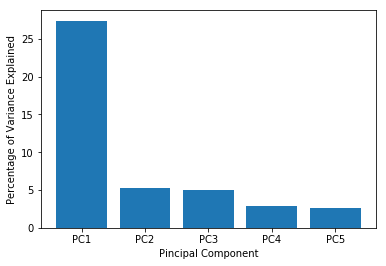

In [14]:
pca = PCA(5)
principalComponents = pca.fit_transform(cleaned)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var )+1)]


plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Pincipal Component')
plt.show()

From this plot it is clear that only the first principle stands out far above the rest. Now we will graph the first two priciple components. 

# Results

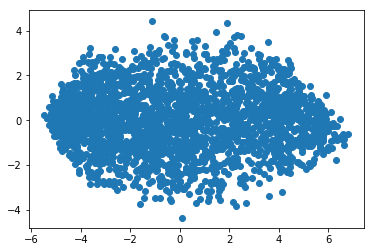

In [15]:
pca = PCA(2)
principalComponents = pca.fit_transform(cleaned)

x = principalComponents[:,0]
y = principalComponents[:,1]
plt.scatter(x,y)
plt.figure(figsize=(1,2))
plt.show()

This is a graph of the first two pricipal components. In this image the x-axis is the axis of greatest variance, as is expected, and the y-axis

### Self-Identified Liberals / Conservatives

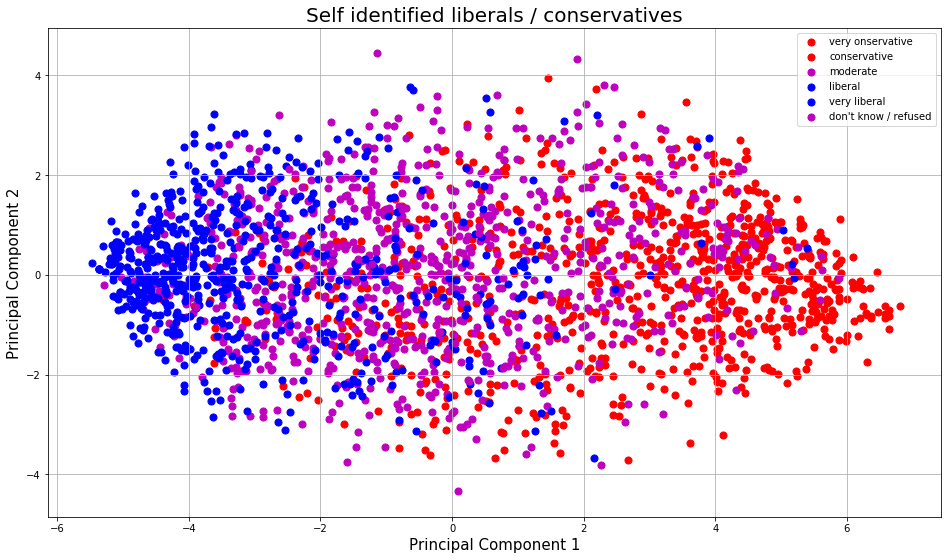

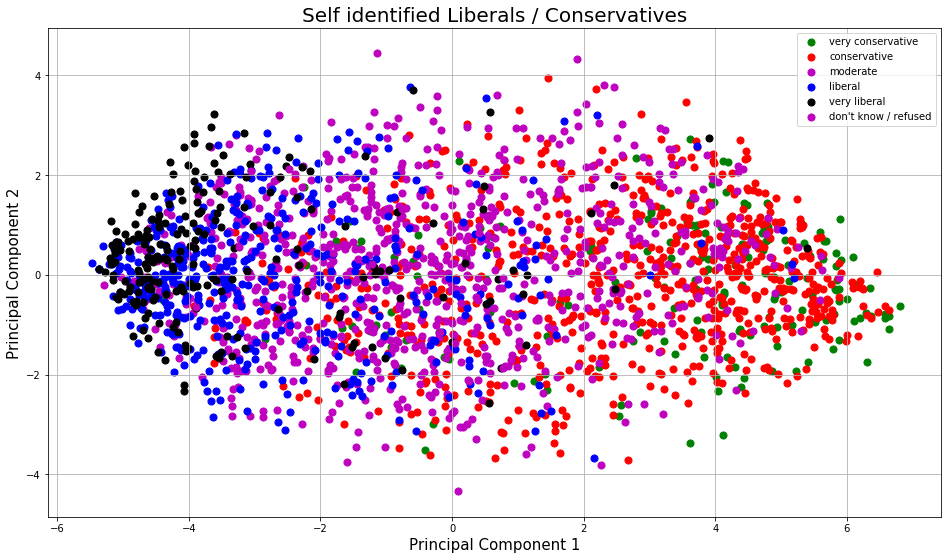

In [16]:
target = form1['ideo']
df = pd.DataFrame(principalComponents)
finalDf = pd.concat([df, target], axis =1)

finalDf = finalDf.rename(index=str, columns={0: 'principal component 1', 1: 'principal component 2'})

fig = plt.figure(figsize = (16,9)) 


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Self identified liberals / conservatives', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['r', 'r', 'm', 'b', 'b', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ideo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['very onservative', 'conservative', 'moderate', 'liberal', 'very liberal', "don't know / refused"])
ax.grid()




fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Self identified Liberals / Conservatives', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['g', 'r', 'm', 'b', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ideo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['very conservative', 'conservative', 'moderate', 'liberal', 'very liberal', "don't know / refused"])
ax.grid()

plt.show()

### Approval of Donald Trump

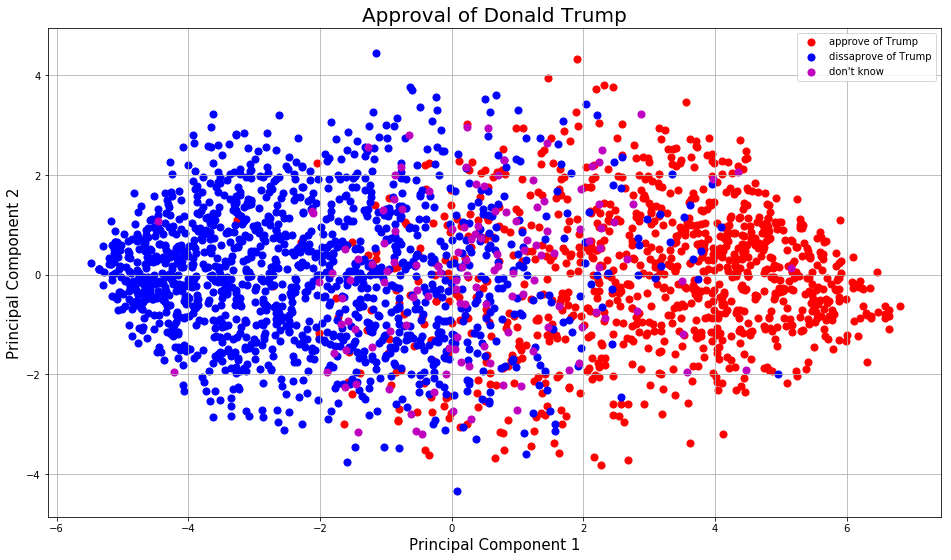

In [17]:
target2 = form1['qa1']
finalDf2 = pd.concat([df, target2], axis =1)
finalDf2 = finalDf2.rename(index=str, columns={0: 'principal component 1', 1: 'principal component 2'})

fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Approval of Donald Trump', fontsize = 20)
targets = [1, 2, 9]
colors = ['r', 'b', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['qa1'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['approve of Trump', 'dissaprove of Trump', "don't know"])
ax.grid()
plt.show()


## clustering

In [18]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [19]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [20]:
Z = linkage(cleaned, 'ward')

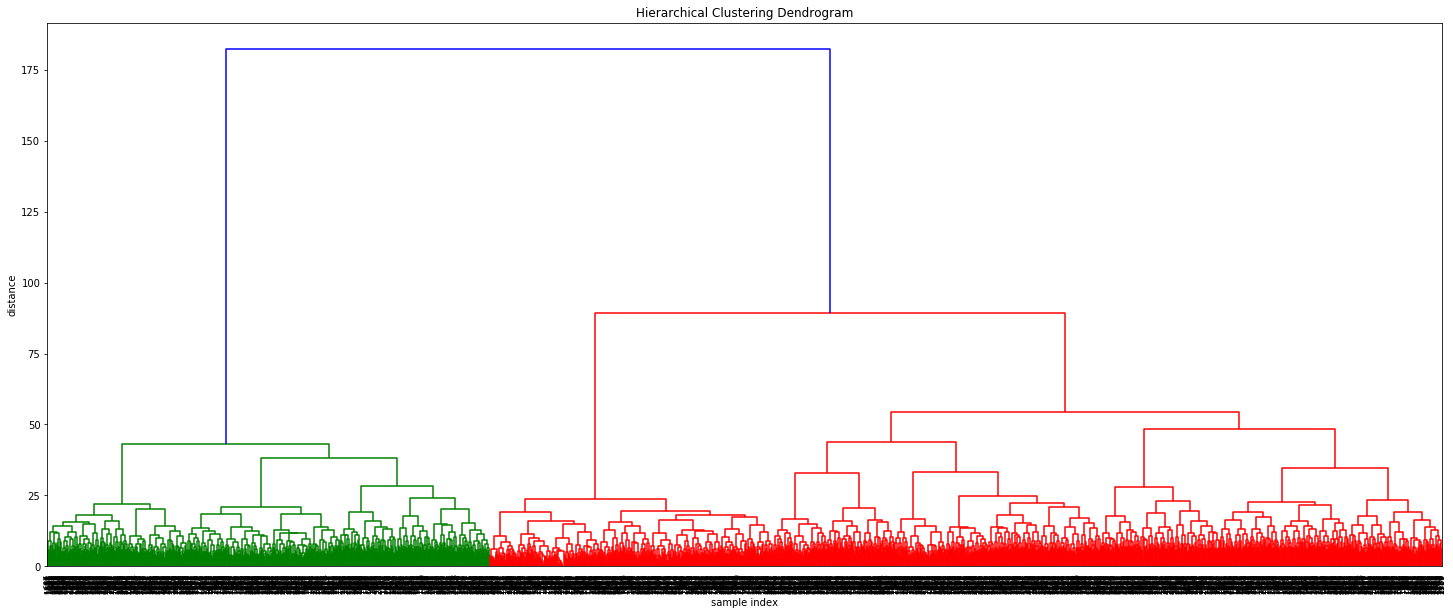

In [21]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [22]:
# set cut-off to 50
max_d = 100 # max_d as in max_distance

In [23]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, ..., 1, 2, 2], dtype=int32)

In [24]:
colarr = []
for i in range(len(clusters)):
    if clusters[i] == 1:
        colarr.append('r')
    if clusters[i] == 2:
        colarr.append('b')

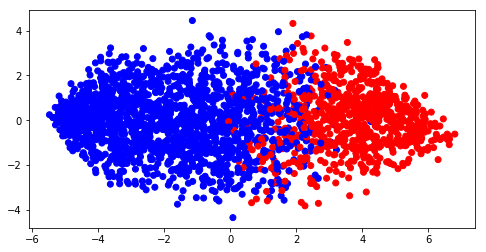

In [25]:
fig = plt.figure(figsize = (8,4))

plt.scatter(x,y, c = colarr)
plt.figure(figsize=(1,2))
plt.show()

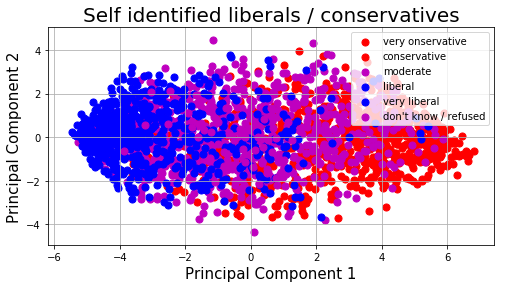

In [26]:
fig = plt.figure(figsize = (8,4)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Self identified liberals / conservatives', fontsize = 20)
targets = [1, 2, 3, 4, 5, 9]
colors = ['r', 'r', 'm', 'b', 'b', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ideo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['very onservative', 'conservative', 'moderate', 'liberal', 'very liberal', "don't know / refused"])
ax.grid()

# Conclusions and Next Steps
As can be seen be these charts, the first PC seems to correspond very well to the left / right dimension. This suggests that thinking of the political spectrum in this way actually makes sense.

Also it should come as no surprise that that the first principal component also does a good job splitting up Donald Trump supporter from non supporters. Supporters are on the same side that corresponds to conservatives and vice versa.

When clustering is done it is interesting to observe that the one cluster has many more sub clusters than the other. When the two clusters are color coded on the PCA diagram you can see how well they are seperated when projected onto those axes. It is also obvious through observation that the liberal cluster has more people in it than the conservative cluster, and it is clear that the liberal cluster is the one with more sub clusters. Looking at the dendogram in cell 21 you can also see that there are sub clusters at a much further distance from each other in the liberal cluster. 

Also it should be noted that the data was not centered or scaled before doing PCA. This was because the means for all the variables were expected to be around 0 and their variaances were all expected to be similar.